In [1]:
#Step 1: Importing the required Libraries.
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import squarify
import numpy as np

In [2]:
#Step 2: Importing the Dataset
df = pd.read_excel('Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
#Check the shape of Dataset
df.shape

(541909, 8)

In [5]:
#Check the columns names (features)
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
#Check the Each columns summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
#Check the statitical values of the datatset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
'''Data Cleaning
Look for Null Values
'''
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<AxesSubplot:>

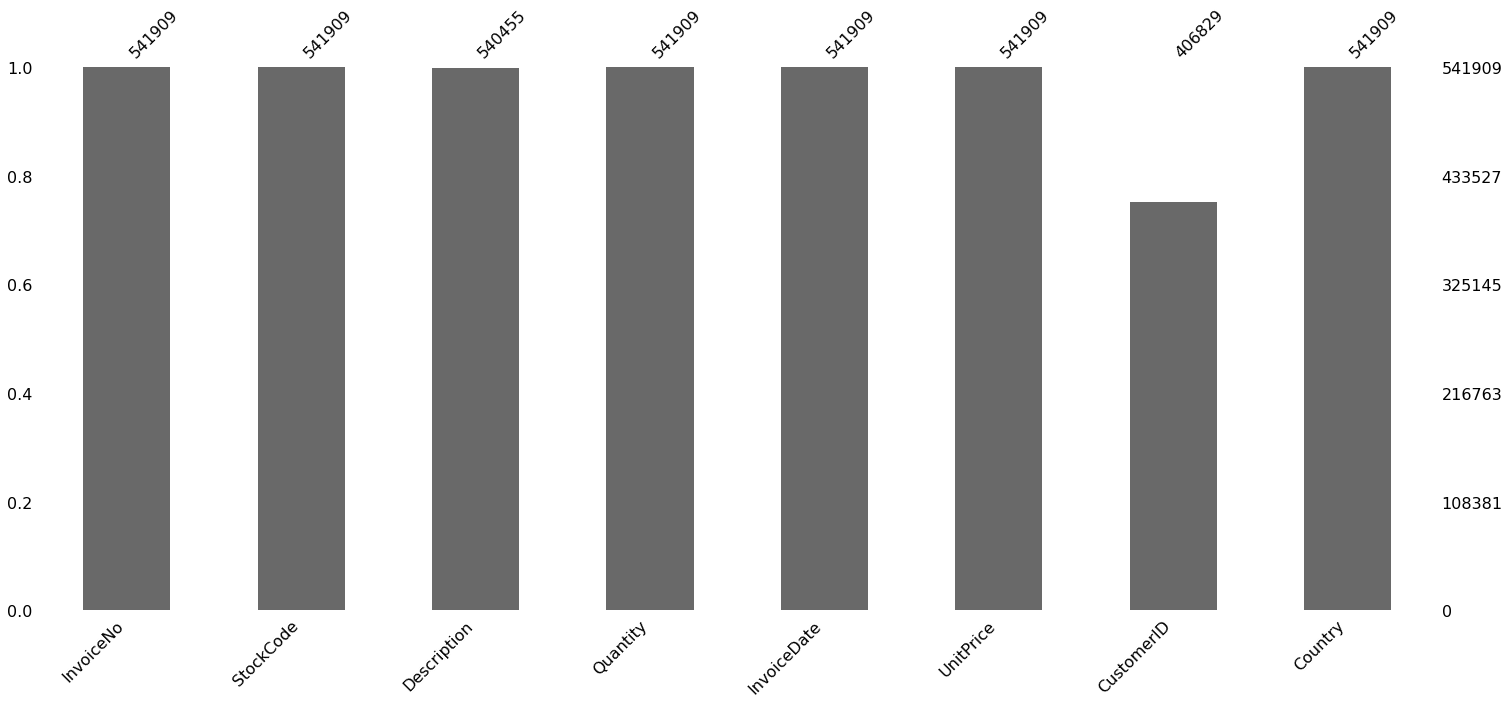

In [11]:
msno.bar(df) 

In [12]:
#Dropping Rows if any column having null values
df.dropna(inplace=True)

In [13]:
#Checking Shape again of the Dataset
df.shape

(406829, 8)

<AxesSubplot:>

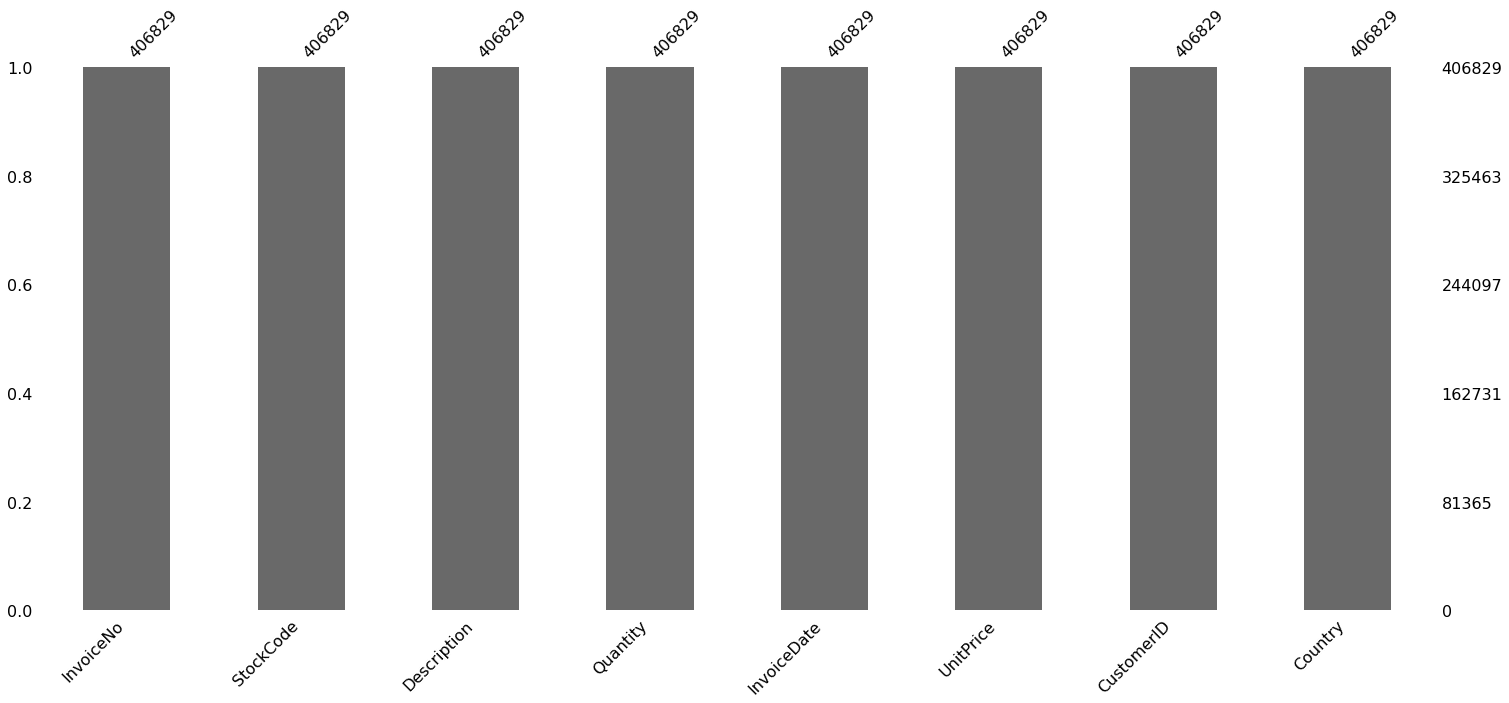

In [14]:
msno.bar(df) 

In [15]:
#Verify Quantity must be Greater than Zero
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [16]:
#Dropping Rows in which Quantity < 0
df.drop(df[df['Quantity'] <= 0].index,inplace=True)
#Checking Shape Again 
df.shape

(397924, 8)

In [19]:
#Dropping Rows in which Unit Price < 0
df.drop(df[df['UnitPrice'] <= 0].index,inplace=True)
df.shape

(397884, 8)

In [20]:
#Check the Customer ID Length
df['CustomerID'] = df['CustomerID'].astype(int)
df['CustomerID'] = df['CustomerID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


In [21]:
df['CustomerID'].dtype

dtype('O')

In [22]:
for i in df['CustomerID']:
    if len(i) !=5:
        print(i)
print("CustomerID is fine")

CustomerID is fine


In [23]:
#Checking Duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


In [24]:
duplicate = df[df.duplicated('InvoiceNo')] 
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [25]:
#The Invoice Number seems to be same but the Stock Codes are different. So this will not be considered as Duplicates.
#Verify Invoice Number
df['InvoiceNo'].count()

397884

In [26]:
df['InvoiceNo'].dtypes

dtype('O')

In [27]:
#All Invoice Numbers starting with 'C' are removed while removing the Unit and Quantity <= 0 condition
#Statistical Data Analysis
df.describe()

,Quantity,UnitPrice
count,397884.000000,397884.000000
mean,12.988238,3.116488
std,179.331775,22.097877
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [28]:
df[df.Quantity == df.Quantity.max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


In [29]:
df[df.Quantity == df.Quantity.min()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
113,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311,United Kingdom
114,536381,22262,FELT EGG COSY CHICKEN,1,2010-12-01 09:41:00,0.85,15311,United Kingdom
115,536381,22637,PIGGY BANK RETROSPOT,1,2010-12-01 09:41:00,2.55,15311,United Kingdom
118,536381,21166,COOK WITH WINE METAL SIGN,1,2010-12-01 09:41:00,1.95,15311,United Kingdom
120,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,2010-12-01 09:41:00,2.95,15311,United Kingdom
...,...,...,...,...,...,...,...,...
541851,581580,22721,SET OF 3 CAKE TINS SKETCHBOOK,1,2011-12-09 12:20:00,1.95,12748,United Kingdom
541855,581580,21351,CINAMMON & ORANGE WREATH,1,2011-12-09 12:20:00,6.75,12748,United Kingdom
541856,581580,22698,PINK REGENCY TEACUP AND SAUCER,1,2011-12-09 12:20:00,2.95,12748,United Kingdom
541857,581580,22567,20 DOLLY PEGS RETROSPOT,1,2011-12-09 12:20:00,1.45,12748,United Kingdom


In [30]:
df[df.UnitPrice == df.UnitPrice.min()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198,United Kingdom
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405,United Kingdom


In [31]:
df[df.UnitPrice == df.UnitPrice.max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom


In [32]:
df[df.Country == 'United Kingdom']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom


In [33]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [34]:
df['Country'].value_counts()

United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [35]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
                                      ... 
RUBY GLASS CLUSTER EARRINGS              1
PINK CHRYSANTHEMUMS ART FLOWER           1
72 CAKE CASES VINTAGE CHRISTMAS          1
WALL ART , THE MAGIC FOREST              1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 3877, dtype: int64

In [36]:
#Getting the Highest Quantity Countrywise
gb =df.groupby('Country').Quantity.max()
gb

Country
Australia                1152
Austria                   288
Bahrain                    96
Belgium                   272
Brazil                     24
Canada                    504
Channel Islands           407
Cyprus                    288
Czech Republic             72
Denmark                   256
EIRE                     1440
European Community         24
Finland                   144
France                    912
Germany                   600
Greece                     48
Iceland                   240
Israel                    100
Italy                     200
Japan                    2040
Lebanon                    24
Lithuania                  48
Malta                      48
Netherlands              2400
Norway                    240
Poland                     72
Portugal                  120
RSA                        12
Saudi Arabia               12
Singapore                 288
Spain                     360
Sweden                    768
Switzerland               288
US

In [37]:
#Visualization of Various Attributes
#Finding Numerical Variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


In [38]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [39]:
df['InvoiceDate'].dtypes

dtype('<M8[ns]')

In [40]:
numerical_variables = [feature for feature in df.columns if (df[feature].dtypes != 'O' and df[feature].dtypes !='<M8[ns]')]
numerical_variables

['Quantity', 'UnitPrice']

In [41]:
#Create New Feature Year from Invoice Date
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [42]:
df['YearOfSale'] = pd.DatetimeIndex(df['InvoiceDate']).year
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011


In [44]:
#Finding Correlation
df_corr = df[numerical_variables].corr()
df_corr

,Quantity,UnitPrice
Quantity,1.000000,-0.004563
UnitPrice,-0.004563,1.000000


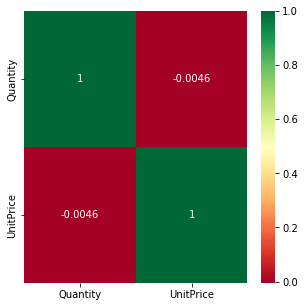

In [45]:
fig, ax = plt.subplots(figsize=(5,5))
heat_map = sns.heatmap(df_corr,annot=True,cmap="RdYlGn",ax=ax)

In [46]:
#Plots to get the Statistical Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
 8   YearOfSale   397884 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 30.4+ MB


In [47]:
df.describe()

,Quantity,UnitPrice,YearOfSale
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,2010.934260
std,179.331775,22.097877,0.247828
min,1.000000,0.001000,2010.000000
25%,2.000000,1.250000,2011.000000
50%,6.000000,1.950000,2011.000000
75%,12.000000,3.750000,2011.000000
max,80995.000000,8142.750000,2011.000000


In [48]:
#Fetch Top 5 Countries Quantity wise Data
df.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False)[:5]

Country
United Kingdom    4256740
Netherlands        200361
EIRE               140275
Germany            119261
France             111471
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='Country'>

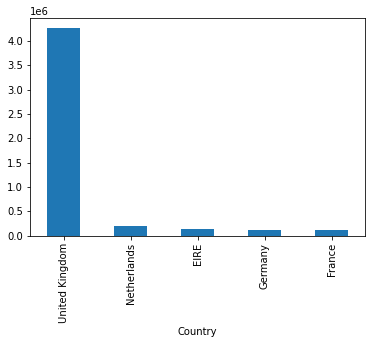

In [49]:
df.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False)[:5].plot(kind='bar')

In [50]:
#Quantity Sales of Year
df['YearOfSale'].unique()

array([2010, 2011])

In [51]:
df.groupby(['YearOfSale'])['Quantity'].sum()

YearOfSale
2010     312265
2011    4855547
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='YearOfSale'>

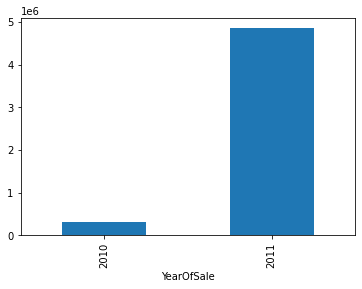

In [52]:
df.groupby(['YearOfSale'])['Quantity'].sum().plot(kind='bar')

<AxesSubplot:xlabel='YearOfSale'>

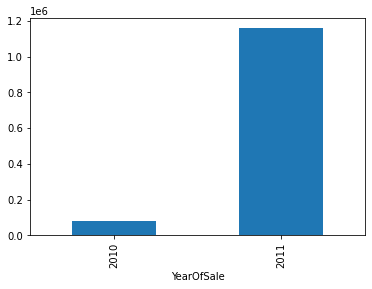

In [53]:
#Total unitprice sold by year
df.groupby(['YearOfSale'])['UnitPrice'].sum().plot(kind='bar')

In [54]:
#Total quantity sold by invoiceno [Top 10]
df.groupby(['InvoiceNo'])['Quantity'].sum().sort_values(ascending=False)[:10]

InvoiceNo
581483    80995
541431    74215
556917    15049
563076    14730
572035    13392
567423    12572
552883    12266
563614    12196
562439    11848
548011    11116
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='InvoiceNo'>

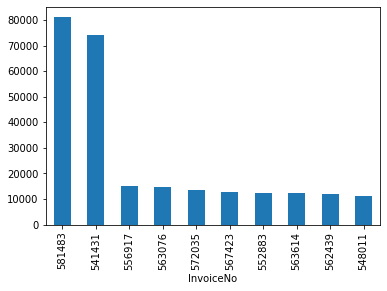

In [55]:
df.groupby(['InvoiceNo'])['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

In [56]:
'''
RFM is an acronym of recency, frequency and monetary.
Recency is about when was the last order of a customer.
It means the number of days since a customer made the last purchase. 
If it’s a case for a website or an app, this could be interpreted as the last visit day or the last login time.
Frequency is about the number of purchase in a given period.
It could be 3 months, 6 months or 1 year. So we can understand this value as for
how often or how many a customer used the product of a company. The bigger the value is,
the more engaged the customers are. Could we say them as our VIP? Not necessary. 
Cause we also have to think about how much they actually paid for each purchase, which means monetary value.
Monetary is the total amount of money a customer spent in that given period. 
Therefore big spenders will be differentiated with other customers such as MVP or VIP.
'''
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [57]:
df['InvoiceNo']

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 397884, dtype: object

In [58]:
df[['Quantity','UnitPrice']]

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
541904,12,0.85
541905,6,2.10
541906,4,4.15
541907,4,4.15


In [60]:
df['Price'] = df['Quantity'] * df['UnitPrice']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
 8   YearOfSale   397884 non-null  int64         
 9   Price        397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 33.4+ MB


In [61]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,20.34


In [62]:
df.Country.nunique()

37

In [63]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [64]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [65]:
Now = dt.datetime(2011,12,10)
Now

datetime.datetime(2011, 12, 10, 0, 0)

In [67]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [68]:
#Create RFM Table
rfmTable = df.groupby('CustomerID').agg({'InvoiceDate' : lambda x :(Now - x.max()).days,
                                         'InvoiceNo' : lambda x :len(x),'Price' : lambda x :sum(x) })
rfmTable.rename(columns ={'InvoiceDate' : 'Recency', 'InvoiceNo' :'Frequency',
                          'Price':'Monetary_Value'},inplace = True)
rfmTable.head()

,Recency,Frequency,Monetary_Value
CustomerID,,,
12346,325,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,18,73,1757.55
12350,310,17,334.40


In [69]:
#Check shape 
rfmTable.shape

(4338, 3)

In [71]:
#Interpretation
#Customer ID - 12346 Purchased product $77183.60 only once 325 Days ago
#Lets Check the details of First Customer of Our RFM Table
df[df['CustomerID']=='12346']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale,Price
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,2011,77183.6


/home/shubharthak/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


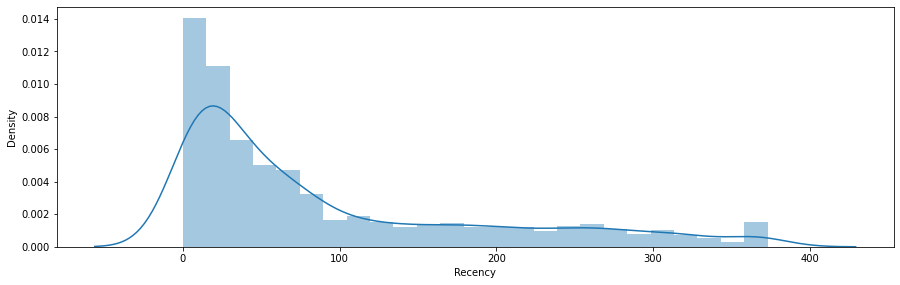

In [72]:
#Plot RFM Distribution
plt.figure(figsize=(15,15))

# Plot Distribution of Recency
plt.subplot(3,1,1)

sns.distplot(rfmTable['Recency'])

plt.show()

/home/shubharthak/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


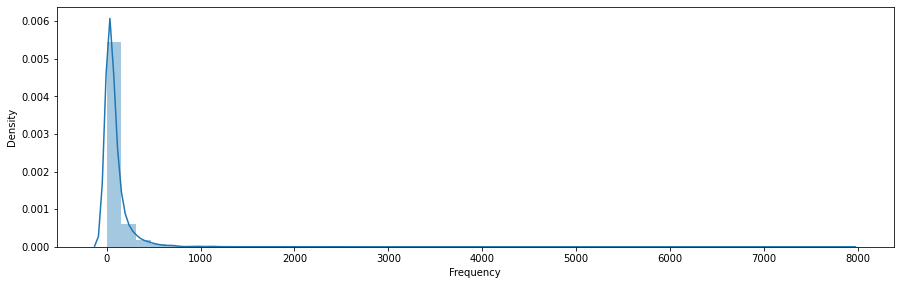

In [73]:
plt.figure(figsize=(15,15))

# Plot Distribution of Frequency
plt.subplot(3,1,3)

sns.distplot(rfmTable['Frequency'])

plt.show()

/home/shubharthak/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


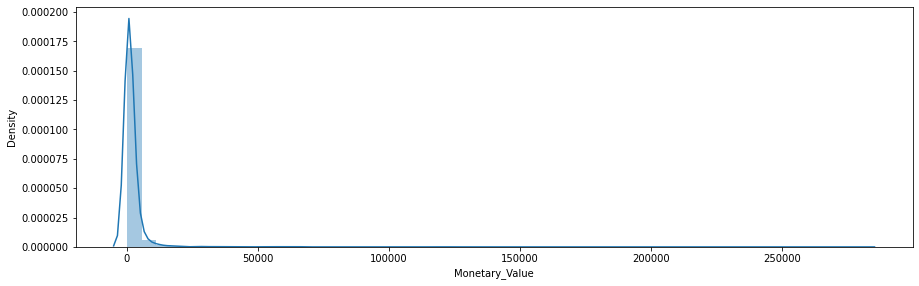

In [74]:
plt.figure(figsize=(15,15))

# Plot Distribution of Monetary 
plt.subplot(3,1,3)

sns.distplot(rfmTable['Monetary_Value'])

plt.show()

In [75]:
#The above graphs depicts the Data distribution.
#Calculate R and F Groups
# We create a 4 labels for our labels, where 4 is the “best” quantile
r_labels = range(4,0,-1)
f_labels = range(1,5)
m_labels = range(1,5)
r_groups = pd.qcut(rfmTable['Recency'],4,r_labels)
f_groups = pd.qcut(rfmTable['Frequency'],4,f_labels)
m_groups = pd.qcut(rfmTable['Monetary_Value'],4,m_labels)
rfmTable = rfmTable.assign(R=r_groups,F=f_groups,M=m_groups)
rfmTable.head()
rfmTable.info()
rfmTable.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Recency         4338 non-null   int64   
 1   Frequency       4338 non-null   int64   
 2   Monetary_Value  4338 non-null   float64 
 3   R               4338 non-null   category
 4   F               4338 non-null   category
 5   M               4338 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 148.7+ KB


Recency              int64
Frequency            int64
Monetary_Value     float64
R                 category
F                 category
M                 category
dtype: object

In [76]:
#RFM Segment & Score
#Convert Categorical to String Datatype
rfmTable['R'] = rfmTable['R'].astype(str)
rfmTable['F'] = rfmTable['F'].astype(str)
rfmTable['M'] = rfmTable['M'].astype(str)

In [77]:
#Creating segments from the given categorical values
rfmTable['RFM_Segment'] = rfmTable['R'].map(str) + rfmTable['F'].map(str) + rfmTable['M'].map(str)
rfmTable.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment
CustomerID,,,,,,,
12346,325,1,77183.60,1,1,4,114
12347,2,182,4310.00,4,4,4,444
12348,75,31,1797.24,2,2,4,224
12349,18,73,1757.55,3,3,4,334
12350,310,17,334.40,1,1,2,112


In [78]:
rfmTable[rfmTable['RFM_Segment'] == '111'].sort_values(by='CustomerID')

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment
CustomerID,,,,,,,
12353,204,4,89.00,1,1,1,111
12361,287,10,189.90,1,1,1,111
12401,303,5,84.30,1,1,1,111
12402,323,11,225.60,1,1,1,111
12441,366,11,173.55,1,1,1,111
...,...,...,...,...,...,...,...
18224,263,10,158.95,1,1,1,111
18227,217,5,93.75,1,1,1,111
18269,366,7,168.60,1,1,1,111


In [79]:
#Count Number of Unique Segments
rfm_segment = rfmTable.groupby('RFM_Segment')['RFM_Segment']
print('The Number of Unique Segment is - ',rfm_segment.nunique().sum())
print('*' * 50)
print(rfm_segment.unique())
print('*' * 50)

The Number of Unique Segment is -  61
**************************************************
RFM_Segment
111    [111]
112    [112]
113    [113]
114    [114]
121    [121]
       ...  
434    [434]
441    [441]
442    [442]
443    [443]
444    [444]
Name: RFM_Segment, Length: 61, dtype: object
**************************************************


In [81]:
#RFM SCORE
rfmTable['R'] = rfmTable['R'].astype(int)
rfmTable['F'] = rfmTable['F'].astype(int)
rfmTable['M'] = rfmTable['M'].astype(int)
rfmTable['RFM_Score'] = rfmTable[['R','F','M']].sum(axis=1)
rfmTable

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346,325,1,77183.60,1,1,4,114,6
12347,2,182,4310.00,4,4,4,444,12
12348,75,31,1797.24,2,2,4,224,8
12349,18,73,1757.55,3,3,4,334,10
12350,310,17,334.40,1,1,2,112,4
...,...,...,...,...,...,...,...,...
18280,277,10,180.60,1,1,1,111,3
18281,180,7,80.82,1,1,1,111,3
18282,7,12,178.05,4,1,1,411,6


In [82]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfmTable['RFM_Level'] = rfmTable.apply(rfm_level, axis=1)
rfmTable.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346,325,1,77183.60,1,1,4,114,6,Potential
12347,2,182,4310.00,4,4,4,444,12,Can't Loose Them
12348,75,31,1797.24,2,2,4,224,8,Champions
12349,18,73,1757.55,3,3,4,334,10,Can't Loose Them
12350,310,17,334.40,1,1,2,112,4,Needs Attention


In [83]:
#Grouping Customers by RFM Level
rfm_level_agg = rfmTable.groupby('RFM_Level').agg({'Recency' :'mean',
                                       'Frequency':'mean',
                                       'Monetary_Value':['mean','count']}).round(1)
rfm_level_agg

Recency Frequency Monetary_Value      
                      mean      mean           mean count
RFM_Level                                                
Can't Loose Them      25.9     192.0         4406.5  1676
Champions             63.7      57.0          994.1   459
Loyal                 79.3      38.7          760.4   452
Needs Attention      174.2      13.7          239.0   385
Potential             95.6      28.0          823.8   464
Promising            153.3      21.4          368.7   517
Require Activation   260.4       8.2          159.3   385

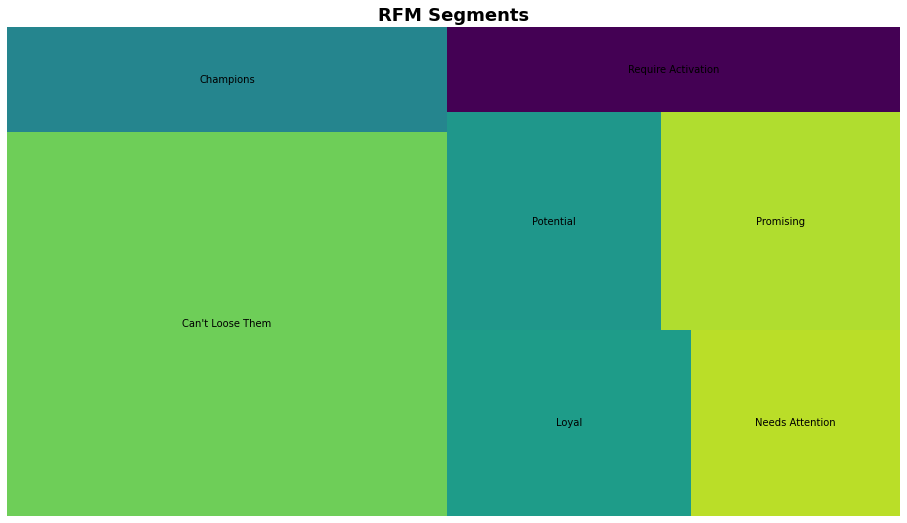

In [84]:
#RFM Level Visualization
#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=["Can't Loose Them",
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=1)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [85]:
#Customer Segmentation Using K Means Clustering
rfm_rfm = rfmTable[['Recency','Frequency','Monetary_Value']]
print(rfm_rfm.describe())

           Recency    Frequency  Monetary_Value
count  4338.000000  4338.000000     4338.000000
mean     92.059474    91.720609     2054.266460
std     100.012264   228.785094     8989.230441
min       0.000000     1.000000        3.750000
25%      17.000000    17.000000      307.415000
50%      50.000000    41.000000      674.485000
75%     141.750000   100.000000     1661.740000
max     373.000000  7847.000000   280206.020000


/home/shubharthak/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/shubharthak/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/shubharthak/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

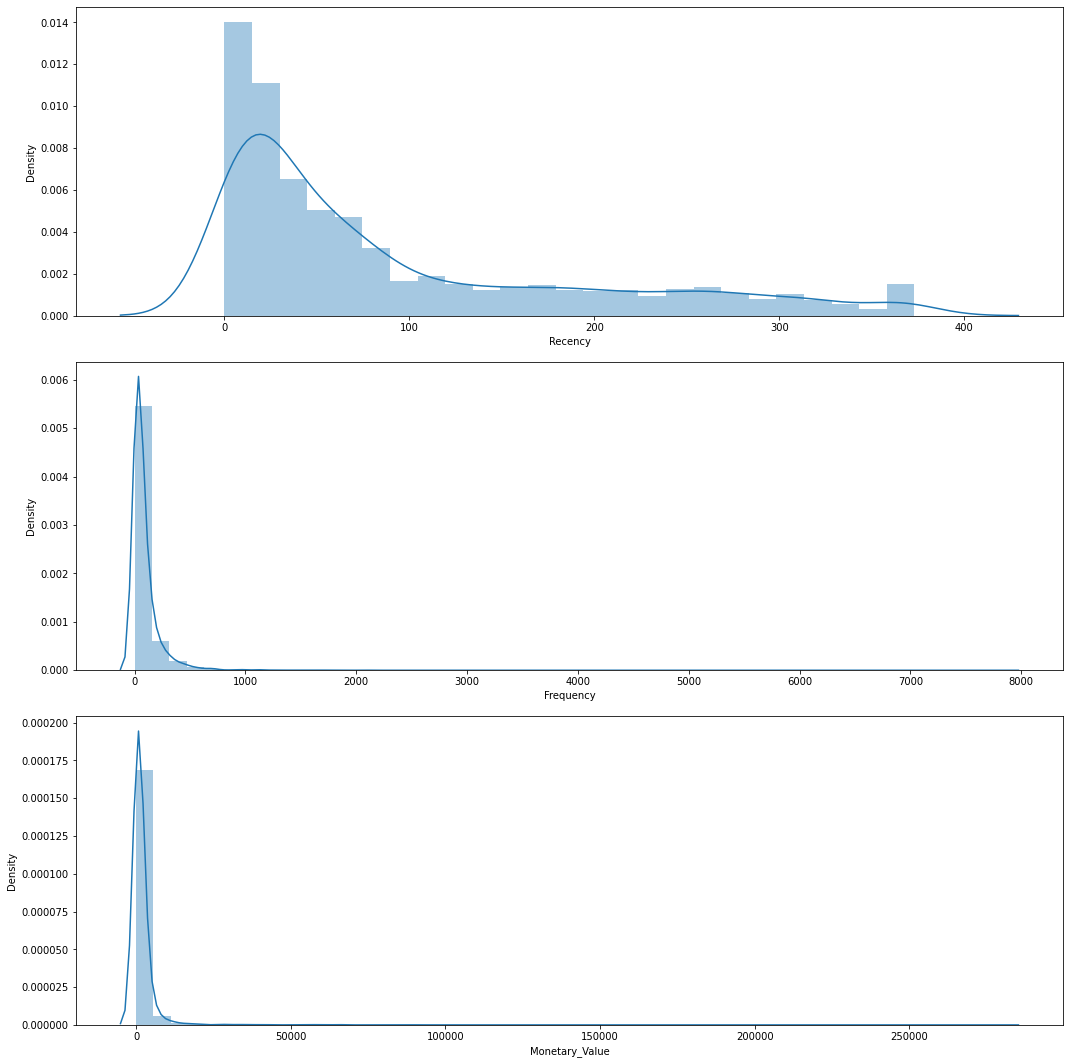

In [86]:
#As we saw the Mean and Variances are differing so we need to apply Data Normalisation
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(15, 15))
plt.subplot(3, 1, 1); sns.distplot(rfmTable.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfmTable.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfmTable.Monetary_Value, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

/home/shubharthak/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/shubharthak/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/shubharthak/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

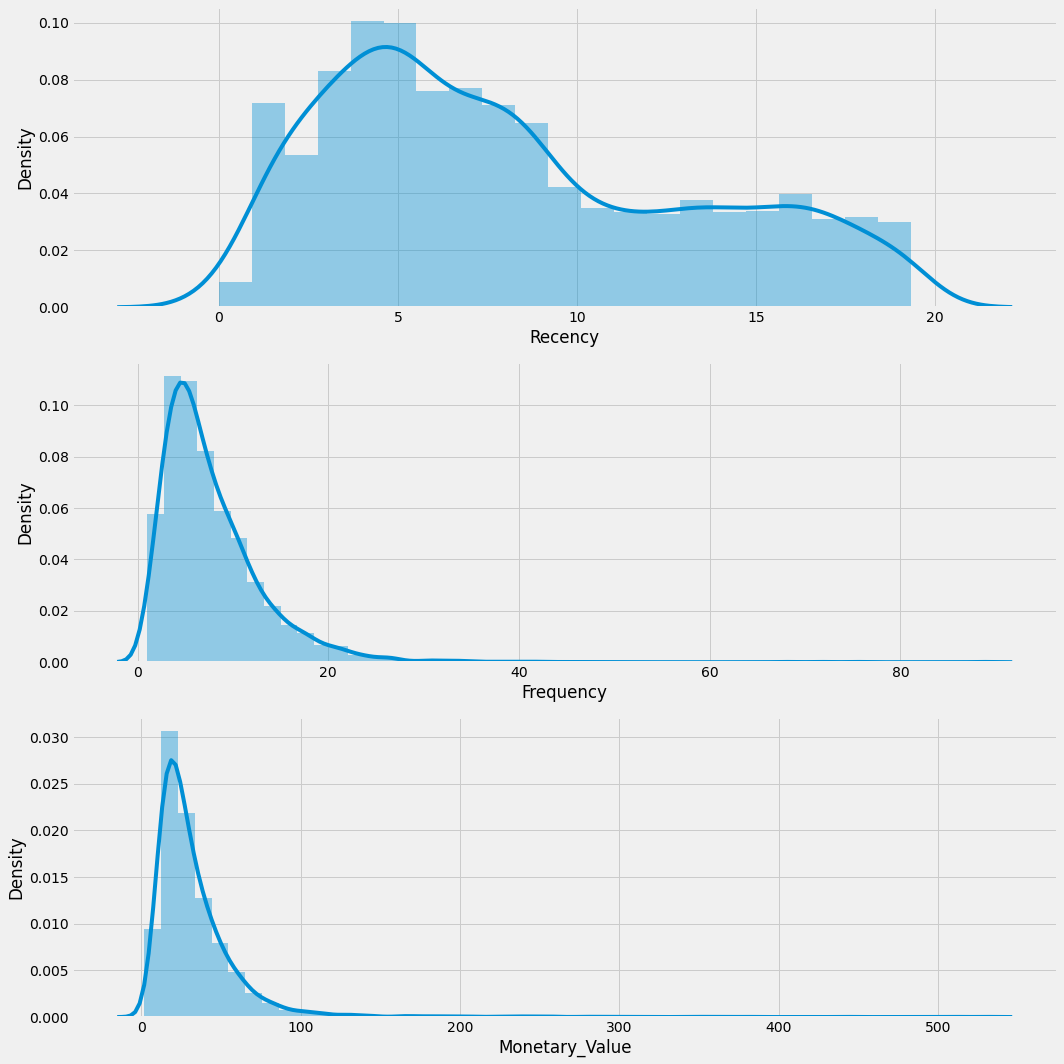

In [87]:
#Unsymmetric Distribution of Data - We have to apply Square Root Transformation and verify the Distribution again
rfm_sqrt = rfmTable[['Recency', 'Frequency', 'Monetary_Value']].apply(np.sqrt, axis = 1).round(3)
f,ax = plt.subplots(figsize=(15, 15))
plt.subplot(3, 1, 1); sns.distplot(rfm_sqrt.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_sqrt.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_sqrt.Monetary_Value, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [88]:
rfm_sqrt.skew()

Recency           0.568207
Frequency         3.223301
Monetary_Value    5.887800
dtype: float64

In [89]:
#Implementation of K Means Clustering
'''
Steps :

1. Preprocessing the Data
2. Determine the Number of Clusters
3. Running K Means Clustering on the Preprocessed Data
4. Analyse average RFM Values of each Cluster
'''
#Preprocessing the  Data
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_sqrt)
rfm_normalized.shape

(4338, 3)

In [92]:
#Choosing the Number of Clusters
#Elbow Method
from sklearn.cluster import KMeans 
inertia = []
kr = range(1,8)
for k in kr:
    km = KMeans(n_clusters = k,random_state=1)
    km.fit(rfm_normalized)
    inertia.append(km.inertia_)
inertia

[13013.999999999998,
 8258.24003956994,
 5672.519703051787,
 4217.659877913246,
 3490.3620896540756,
 3113.435636649051,
 2789.865653361161]

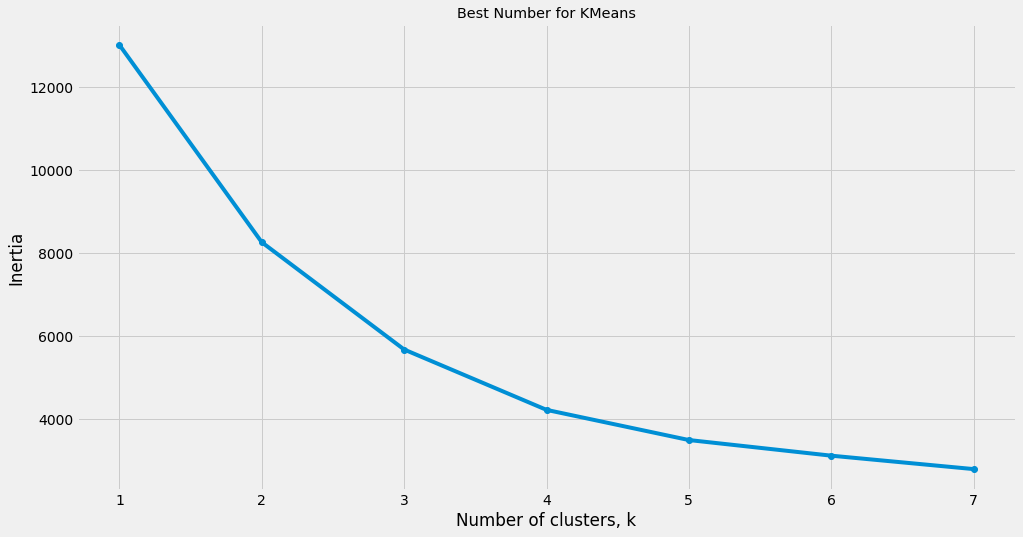

In [93]:
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('Best Number for KMeans')
plt.show()

In [94]:
# clustering
kc = KMeans(n_clusters=3,random_state=1)
kc.fit(rfm_normalized)

KMeans(n_clusters=3, random_state=1)

In [95]:
# Assign the clusters to datamart
rfmTable['K_Cluster'] = kc.labels_
rfmTable.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
CustomerID,,,,,,,,,,
12346,325,1,77183.60,1,1,4,114,6,Potential,1
12347,2,182,4310.00,4,4,4,444,12,Can't Loose Them,1
12348,75,31,1797.24,2,2,4,224,8,Champions,0
12349,18,73,1757.55,3,3,4,334,10,Can't Loose Them,0
12350,310,17,334.40,1,1,2,112,4,Needs Attention,2


[]

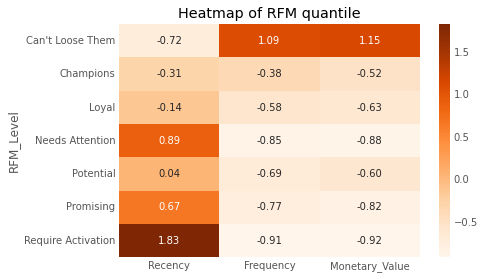

In [96]:
# the mean value in total 
total_avg = rfmTable.iloc[:, 0:3].mean()
total_avg
# calculate the proportional gap with total mean
cluster_avg = rfmTable.groupby('RFM_Level').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1
# heatmap with RFM
sns.heatmap(prop_rfm, cmap= 'Oranges', fmt= '.2f', annot = True)
plt.title('Heatmap of RFM quantile')
plt.plot()

[]

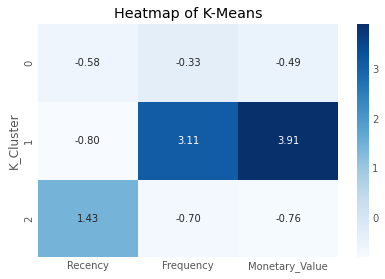

In [97]:
# calculate the proportional gap with total mean
cluster_avg_K = rfmTable.groupby('K_Cluster').mean().iloc[:, 0:3]
prop_rfm_K = cluster_avg_K/total_avg - 1
# heatmap with K-means
sns.heatmap(prop_rfm_K, cmap= 'Blues', fmt= '.2f', annot = True)
plt.title('Heatmap of K-Means')
plt.plot()